In [ ]:
!git clone https://github.com/RomanChaganov/ner-re-project.git

Cloning into 'ner-re-project'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 81 (delta 19), reused 47 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 459.49 KiB | 1.72 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
%cd ner-re-project

/content/ner-re-project


In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!unrar x data.rar resources/data/

In [8]:
!python3 scripts/mask_texts.py

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/home/mpirtgod/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/mpirtgod/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|████████████████████████████████████████| 120/120 [00:00<00:00, 596.53it/s]


In [9]:
!mv resources/data/train/masked_texts.jsonl resources/data/train/masked_texts.json

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [1]:
!python3 mlm.py --device cuda --batch-size 5 --epochs 10

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/home/mpirtgod/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/mpirtgod/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/mpirtgod/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at sberbank-ai/ruBert-base were not used when initializing BertForMaske

In [4]:
!python3 -m scripts.tokenize_texts0
!python3 -m scripts.tokenize_texts0 --dir resources/data/test --label2id resources/data/train/label2id.json --retag2id resources/data/train/retag2id.json

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
 28%|███████████▌                             | 34/120 [00:00<00:00, 601.45it/s]
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/mpirtgod/ner-re-project/scripts/tokenize_texts.py", line 301, in <module>
    main(_args)
  File "/home/mpirtgod/ner-re-project/scripts/tokenize_texts.py", line 254, in main
    arg1_tag = id2annotation[arg1].tag
KeyError: 'T9'
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 618.13it/s]
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in 

In [9]:
!python3 -m scripts.tokenize_texts --hf-tokenizer microsoft/infoxlm-base
!python3 -m scripts.tokenize_texts --dir resources/data/test --label2id resources/data/train/label2id.json --retag2id resources/data/train/retag2id.json --hf-tokenizer microsoft/infoxlm-base

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
config.json: 100%|█████████████████████████████| 512/512 [00:00<00:00, 5.61MB/s]
sentencepiece.bpe.model: 100%|█████████████| 5.07M/5.07M [00:03<00:00, 1.52MB/s]
tokenizer.json: 100%|██████████████████████| 9.10M/9.10M [00:04<00:00, 2.23MB/s]
100%|████████████████████████████████████████| 120/120 [00:00<00:00, 544.62it/s]
224
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 468.06it/s]
45


In [5]:
import torch.cuda

from re_utils.train import train_ner

In [6]:
num_labels = 5
train_tokenized_texts_path = "resources/data/train/labeled_texts.jsonl"
test_tokenized_texts_path = "resources/data/test/labeled_texts.jsonl"
dropout = 0.3
batch_size = 2
epochs = 6
log_every = 5
lr_new_layers = 0.0005
lr_bert = 0.000001
device = "cuda" if torch.cuda.is_available() else "cpu"

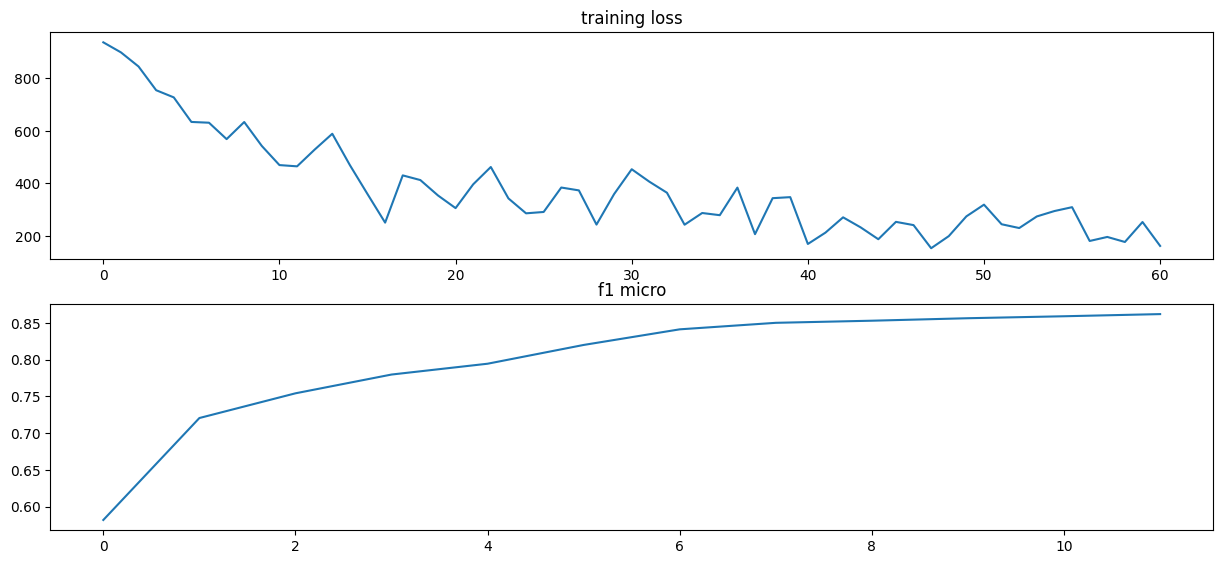

100%|███████████████████████████████████████████████████████████████████████████████████| 61/61 [00:39<00:00,  1.56it/s]


Current loss: 161.7552490234375
Current f1: 0.8617838541666667
Epoch 1/6


  0%|                                                                                            | 0/61 [00:00<?, ?it/s]

{'input_ids': tensor([[23256,   248,   141,  ...,     0,     0,     0],
        [ 7431, 26119,   133,  ...,     0,     0,     0]]), 'labels': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])}
True


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [7]:
train_ner(
    num_labels=num_labels,
    bert_name="sberbank-ai/ruBert-base",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to="weights/bert-crf.pt",
    device=device
)

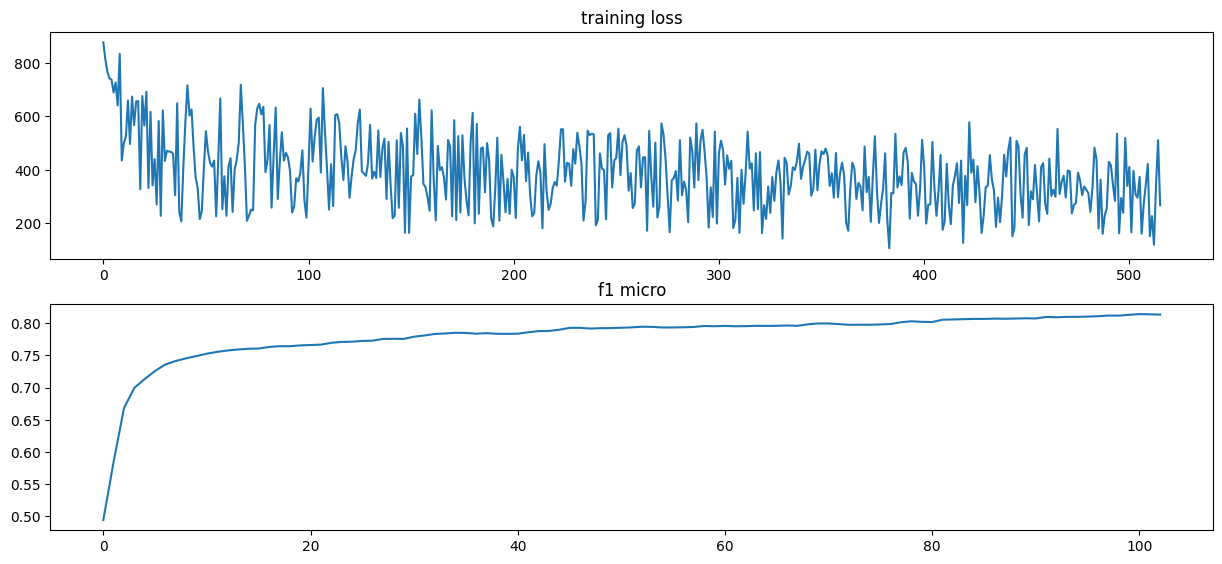

100%|██████████| 86/86 [03:29<00:00,  2.43s/it]

Current loss: 267.9255065917969
Current f1: 0.8134765625
Epoch 6/6


In [13]:
train_ner(
    num_labels=num_labels,
    bert_name="microsoft/infoxlm-base",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to="weights/infoxlm-base.pt",
    device=device
)

In [11]:
from models.bert_crf import BertCrf
from datasets import NerDataset
from torch.utils.data import DataLoader

In [12]:
test_dataset = NerDataset("resources/data/test/labeled_texts.jsonl")
test_data_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    collate_fn=test_dataset.collate_function,
)

In [13]:
model = BertCrf(5, 'sberbank-ai/ruBert-base', 0.2, False)
model.load_from("weights/bert-crf.pt")
model = model.to(device)
model.eval()

/home/mpirtgod/ner-re-project/models/bert_crf.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))


BertCrf(
  (cross_entropy): CrossEntropyLoss()
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [14]:
predictions = []
ground_truth = []
with torch.no_grad():
    for batch in test_data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        prediction = model.decode(input_ids, attention_mask)

        labels = batch['labels'].numpy()

        predictions.extend([item for sublist in prediction for item in sublist])
        ground_truth.extend([item for sublist in labels for item in sublist])


In [15]:
import json
from seqeval.metrics import classification_report

In [16]:
with open('resources/data/train/label2id.json', 'r', encoding='utf-8') as f:
    label2id = json.load(f)
label2id

{'B-VAL': 0, 'I-VAL': 1, 'O': 2, 'B-KEY': 3, 'I-KEY': 4}

In [17]:
id2label = {}
for key, value in label2id.items():
    id2label[value] = key
id2label

{0: 'B-VAL', 1: 'I-VAL', 2: 'O', 3: 'B-KEY', 4: 'I-KEY'}

In [18]:
labels_new = [id2label[id] for id in ground_truth]
predictions_new = [id2label[id] for id in predictions]

In [19]:
print(labels_new)
print(predictions_new)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'O', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'B-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'O', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'B-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'O', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'B-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'O', 'B-VAL', 'I-VAL', 'B-KEY', 'I-KEY', 'O', 'B-KEY', 'I-KEY', 'I-KEY', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'O', 'O', 'O', 'B-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'I-KEY', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'B-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'I-VAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [20]:
b = {}
for x in labels_new:
    if x in b:
        b[x] += 1
    else:
        b[x] = 1

In [21]:
a = {}
for x in predictions_new:
    if x in a:
        a[x] += 1
    else:
        a[x] = 1

In [22]:
len(labels_new)

15360

In [23]:
print(classification_report([labels_new], [predictions_new]))

              precision    recall  f1-score   support

         KEY       0.83      0.83      0.83       432
         VAL       0.66      0.77      0.71       406

   micro avg       0.75      0.80      0.77       838
   macro avg       0.75      0.80      0.77       838
weighted avg       0.75      0.80      0.77       838



In [24]:
!python3 -m scripts.prepare_data_for_re --num-labels 5

/home/mpirtgod/ner-re-project/models/bert_crf.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))
100%|█████████████████████████████

In [25]:
!python3 -m scripts.prepare_data_for_re --labeled-texts resources/data/test/labeled_texts.jsonl --relations resources/data/test/relations.jsonl  --num-labels 5

/home/mpirtgod/ner-re-project/models/bert_crf.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))
100%|█████████████████████████████

In [42]:
from re_utils.train import train_re
import torch

In [43]:
num_re_tags = 2
batch_size = 5
hidden_size = 768
dropout = 0.5
entity_tag_to_id_path = "resources/data/train/entity_tag_to_id.json"
retag2id_path = "resources/data/train/retag2id.json"
re_train_data_path = "resources/data/train/re_data.jsonl"
re_test_data_path = "resources/data/test/re_data.jsonl"
test_relations_path = "resources/data/test/relations.jsonl"
lr = 0.0001
epochs = 80
log_every = 1
TEST_DELETED_RELATIONS_COUNT = 0
device = "cuda" if torch.cuda.is_available() else "cpu"

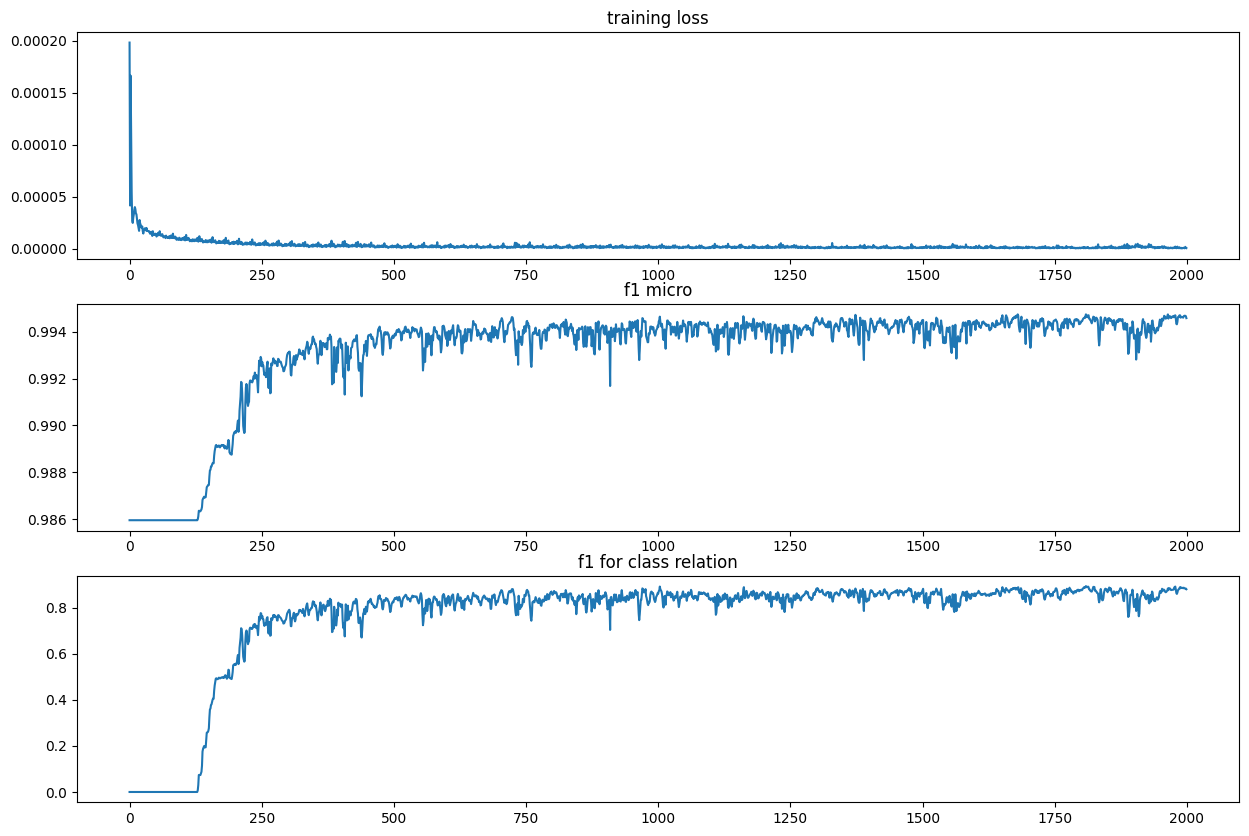

Current loss: 5.467211963150476e-07
Current f1: 0.9945804371914979
Current f1_relation: 0.8800000000000001
Epoch 80/80


In [44]:
train_re(
    num_re_tags = num_re_tags,
    batch_size = batch_size,
    hidden_size = hidden_size,
    dropout = dropout,
    entity_tag_to_id_path = entity_tag_to_id_path,
    retag2id_path=retag2id_path,
    re_train_data_path=re_train_data_path,
    re_test_data_path=re_test_data_path,
    test_relations_path=test_relations_path,
    lr = lr,
    epochs = epochs,
    log_every=log_every,
    test_deleted_relations_count=TEST_DELETED_RELATIONS_COUNT,
    device = device
)

In [45]:
!python3 pipeline.py

/home/mpirtgod/ner-re-project/models/bert_crf.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))
/home/mpirtgod/ner-re-project/mode

In [ ]:
from models.re_bert_crf import ReBertCrf

In [ ]:
model_re = ReBertCrf(2, 768, 0.2, {"VAL": 0, "KEY": 1})
model_re.eval()

ReBertCrf(
  (arg1_linear): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
    (2): Linear(in_features=768, out_features=64, bias=True)
  )
  (arg2_linear): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
    (2): Linear(in_features=768, out_features=64, bias=True)
  )
  (all_seq_linear): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): ReLU()
    (2): Linear(in_features=768, out_features=64, bias=True)
  )
  (relation_classifier): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=2304, out_features=2, bias=True)
  )
  (tag_embeddings): Embedding(2, 64)
)

In [ ]:
import torch.nn as nn

In [ ]:
def count_neurons_via_parameters(model):
    total_neurons = 0
    for name, param in model.named_parameters():
        # if 'weight' in name:  # Проверяем только веса
        total_neurons += param.size(0)  # Суммируем количество выходных нейронов
    return total_neurons

# Подсчет нейронов
num_neurons = count_neurons_via_parameters(model_re)
print(f"Общее количество нейронов в модели: {num_neurons}")

Общее количество нейронов в модели: 390


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ai-forever/ruBert-base")

In [ ]:
input_ids = torch.tensor([input_ids], device=device)

attention_mask = torch.ones(1, input_ids.shape[1], device=device)

_, batched_bert_embeddings = model.get_bert_features(input_ids, attention_mask)
bert_embeddings = batched_bert_embeddings[0]

# full_seq_embedding = get_mean_vector_from_segment(bert_embeddings, 0, len(bert_embeddings)).tolist()
labels = model.decode(input_ids, attention_mask)

labels = [item for sublist in labels for item in sublist]

tags_pos = get_tags_with_positions(labels, id2label)

relation_matrix = np.empty((len(tags_pos), len(tags_pos)))

entity_tags_set = set()
for label, id in label2id.items():
    if label == "O":
        continue
    entity_tags_set.add(label.split("-")[1])
entity_tag_to_id = {tag: id for id, tag in enumerate(entity_tags_set)}

full_seq_embedding = get_mean_vector_from_segment(bert_embeddings, 0, len(bert_embeddings)).tolist()

entities_positions = [item["pos"] for item in tags_pos]
entities_embeddings = [
    get_mean_vector_from_segment(bert_embeddings, pos[0], pos[1]).tolist() for pos in entities_positions
]
entities_tags = [entity_tag_to_id[item["tag"]] for item in tags_pos]